In [2]:
import pandas as pd

df = pd.read_csv("train.csv")
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
# Shape of the dataset
print("Shape:", df.shape)

# Column types, non-null counts
df.info()


Shape: (891, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
df.isnull().sum()


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
df.describe()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


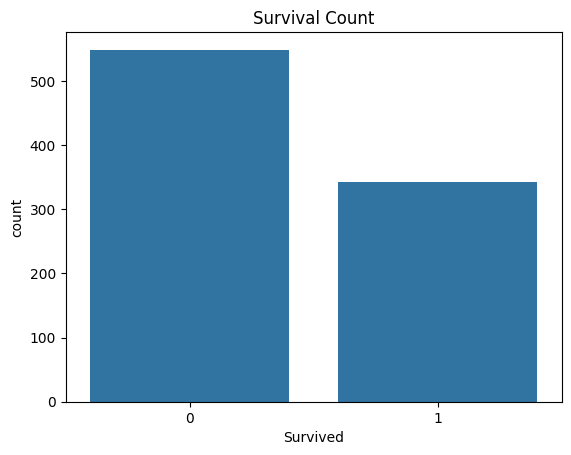

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='Survived', data=df)
plt.title("Survival Count")
plt.show()


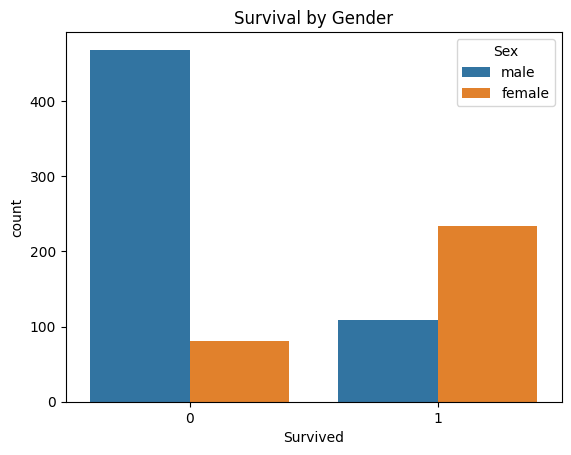

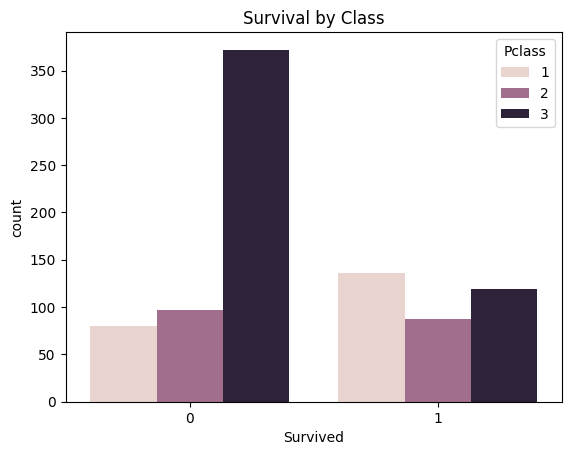

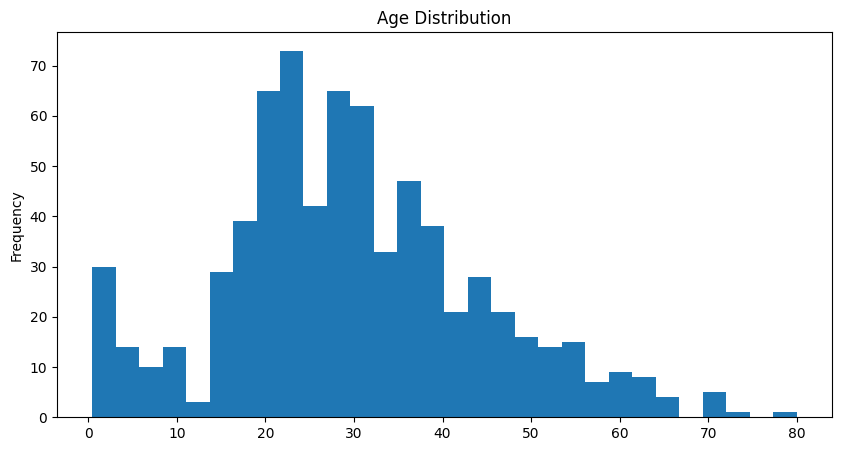

In [7]:
# Gender vs Survival
sns.countplot(x='Survived', hue='Sex', data=df)
plt.title("Survival by Gender")
plt.show()

# Passenger class vs Survival
sns.countplot(x='Survived', hue='Pclass', data=df)
plt.title("Survival by Class")
plt.show()

# Age distribution
df['Age'].plot.hist(bins=30, figsize=(10, 5))
plt.title("Age Distribution")
plt.show()


In [8]:
print("Unique values in Sex:", df['Sex'].unique())
print("Unique values in Embarked:", df['Embarked'].unique())


Unique values in Sex: ['male' 'female']
Unique values in Embarked: ['S' 'C' 'Q' nan]


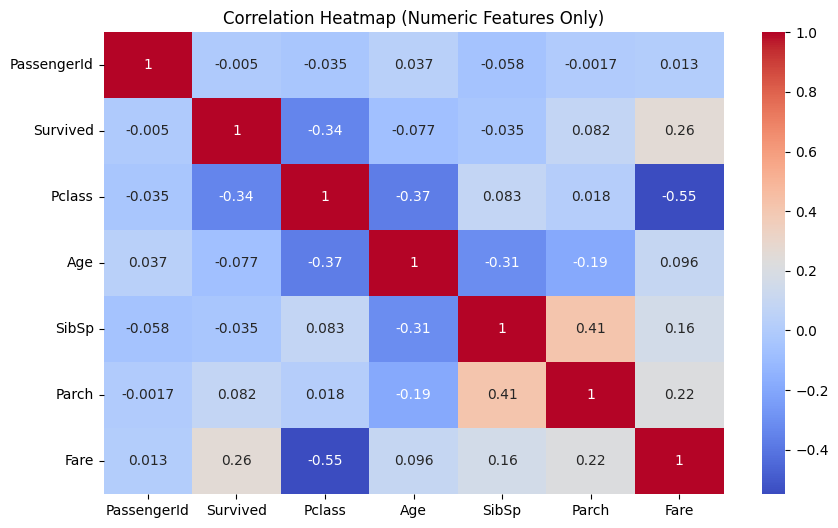

In [10]:
# Select only numeric columns
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Now create the heatmap
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap (Numeric Features Only)")
plt.show()


In [11]:
df.isnull().sum()


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [16]:
# Drop the 'Cabin' column because it's mostly missing
df.drop('Cabin', axis=1, inplace=True, errors='ignore')


# Fill missing Age with median (better than mean due to possible outliers)
df['Age'] = df['Age'].fillna(df['Age'].median())

# Fill missing Embarked with mode (most common value)
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])


In [17]:
# Convert 'Sex' column to 0 (female) and 1 (male)
df['Sex'] = df['Sex'].map({'female': 0, 'male': 1})

# Convert 'Embarked' column using one-hot encoding
embarked_dummies = pd.get_dummies(df['Embarked'], prefix='Embarked', drop_first=True)
df = pd.concat([df, embarked_dummies], axis=1)
df.drop('Embarked', axis=1, inplace=True)


In [18]:
df.drop(['Name', 'Ticket', 'PassengerId'], axis=1, inplace=True)


In [21]:
from sklearn.model_selection import train_test_split

# Select features (columns) for prediction
X = df[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked_Q', 'Embarked_S']]

# The target variable (survival)
y = df['Survived']

# Split the data into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [22]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the shape of the resulting datasets
print(f"Training features: {X_train.shape}")
print(f"Testing features: {X_test.shape}")
print(f"Training target: {y_train.shape}")
print(f"Testing target: {y_test.shape}")


Training features: (712, 8)
Testing features: (179, 8)
Training target: (712,)
Testing target: (179,)


In [29]:
print(df.columns)

from sklearn.preprocessing import OneHotEncoder
import joblib

# Fit the encoder on the 'Embarked' column of your training data
encoder = OneHotEncoder(sparse_output=False)  # Changed to sparse_output=False (for dense output)
encoder.fit(df[['Embarked_Q', 'Embarked_S']])  # Fit encoder to the 'Embarked' column

# Save the encoder using joblib
joblib.dump(encoder, 'encoder.pkl')


Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked_Q', 'Embarked_S'],
      dtype='object')


['encoder.pkl']

In [30]:
from sklearn.ensemble import RandomForestClassifier

# Create a RandomForestClassifier model
rf_model = RandomForestClassifier(random_state=42)

# Train the model with the training data
rf_model.fit(X_train, y_train)

# Check the accuracy of the model on the training data
train_accuracy = rf_model.score(X_train, y_train)
print(f"Training Accuracy: {train_accuracy * 100:.2f}%")

# Check the accuracy of the model on the testing data
test_accuracy = rf_model.score(X_test, y_test)
print(f"Testing Accuracy: {test_accuracy * 100:.2f}%")


Training Accuracy: 97.89%
Testing Accuracy: 81.01%


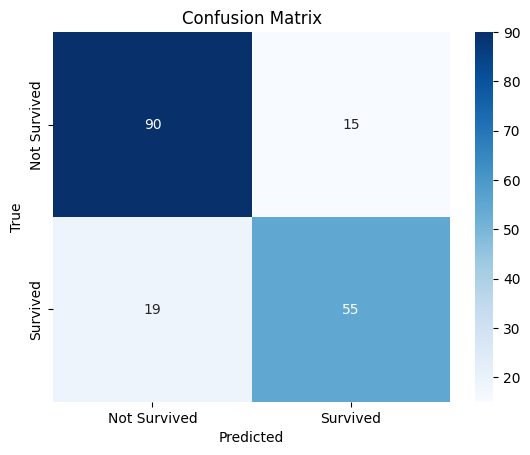

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.86      0.84       105
           1       0.79      0.74      0.76        74

    accuracy                           0.81       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179



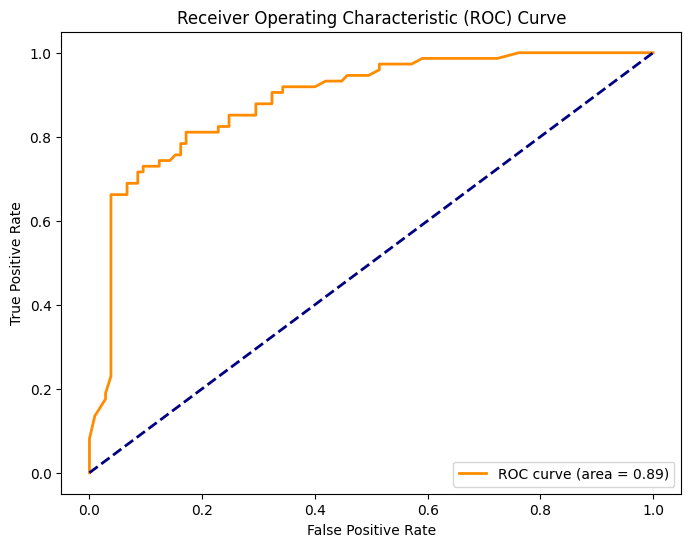

In [24]:
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
import seaborn as sns
import matplotlib.pyplot as plt

# Confusion Matrix
y_pred = rf_model.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Survived', 'Survived'], yticklabels=['Not Survived', 'Survived'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, rf_model.predict_proba(X_test)[:,1])
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


In [26]:
import joblib

# Save the trained model
joblib.dump(rf_model, 'titanic_model.pkl')



['titanic_model.pkl']